In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Ravi\\Downloads\\Houseprice data\\housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
#prepairng data for ML model
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'],axis=1)
#axis=1 reffers to column
#axis=0 reffers to row
y = df['median_house_value']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
#combines the input features (x_train) and the target values (y_train) into a single DataFrame called train_df
train_df=x_train.join(y_train)

In [15]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5155,-118.26,33.96,37.0,1625.0,383.0,1243.0,350.0,1.3971,<1H OCEAN,89800.0
18594,-122.09,37.11,32.0,2637.0,489.0,1031.0,410.0,3.6474,NEAR OCEAN,231600.0
7955,-118.16,33.88,18.0,2287.0,662.0,1804.0,537.0,1.9903,<1H OCEAN,170300.0
1819,-122.32,37.94,47.0,1911.0,283.0,697.0,275.0,6.2712,NEAR BAY,267700.0
16901,-122.34,37.58,50.0,2784.0,743.0,1622.0,698.0,3.8413,NEAR OCEAN,372200.0
...,...,...,...,...,...,...,...,...,...,...
9355,-122.64,37.96,29.0,377.0,58.0,151.0,67.0,9.5551,NEAR OCEAN,500001.0
14747,-117.05,32.58,23.0,1918.0,339.0,1392.0,340.0,4.0870,NEAR OCEAN,134800.0
17458,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,NEAR OCEAN,225000.0
10343,-117.66,33.61,16.0,2022.0,254.0,789.0,270.0,8.4112,<1H OCEAN,286900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

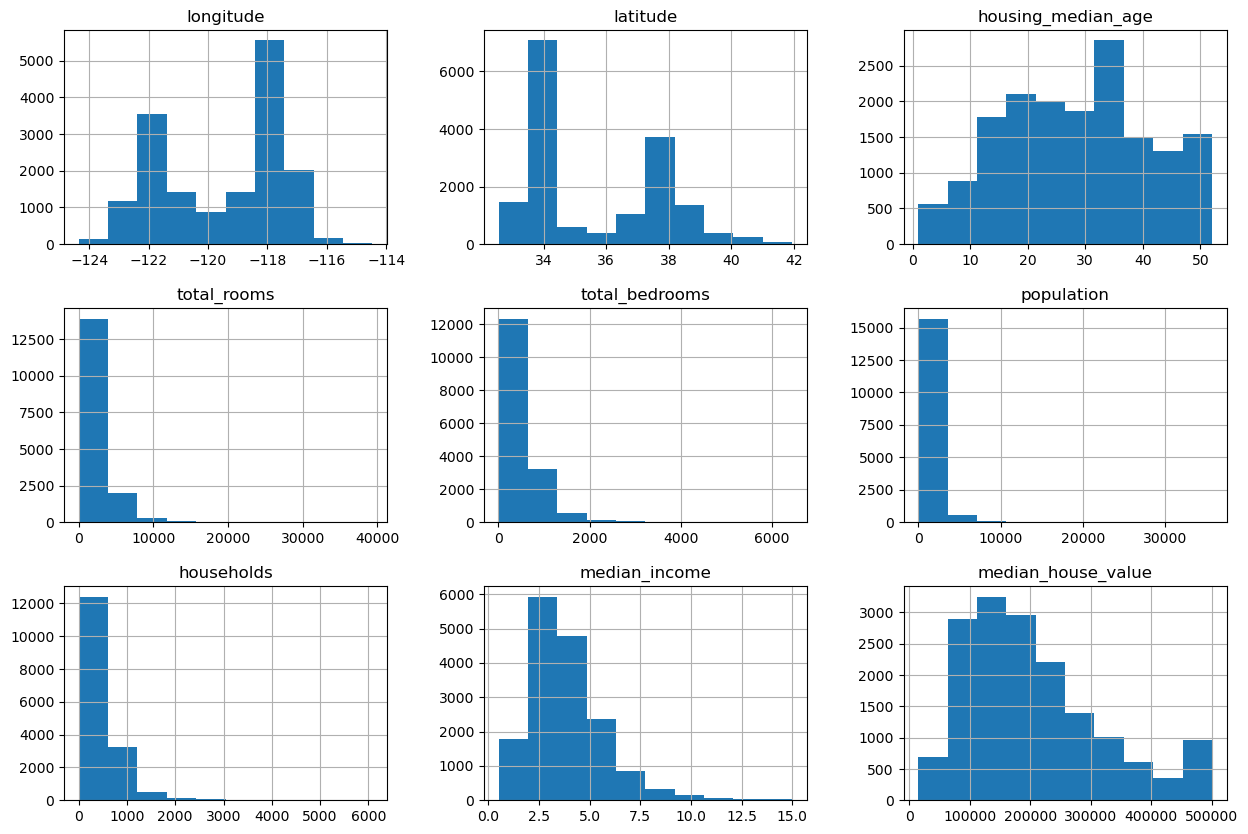

In [17]:
#drawing histogram
train_df.hist(figsize = (15,10))

<Axes: >

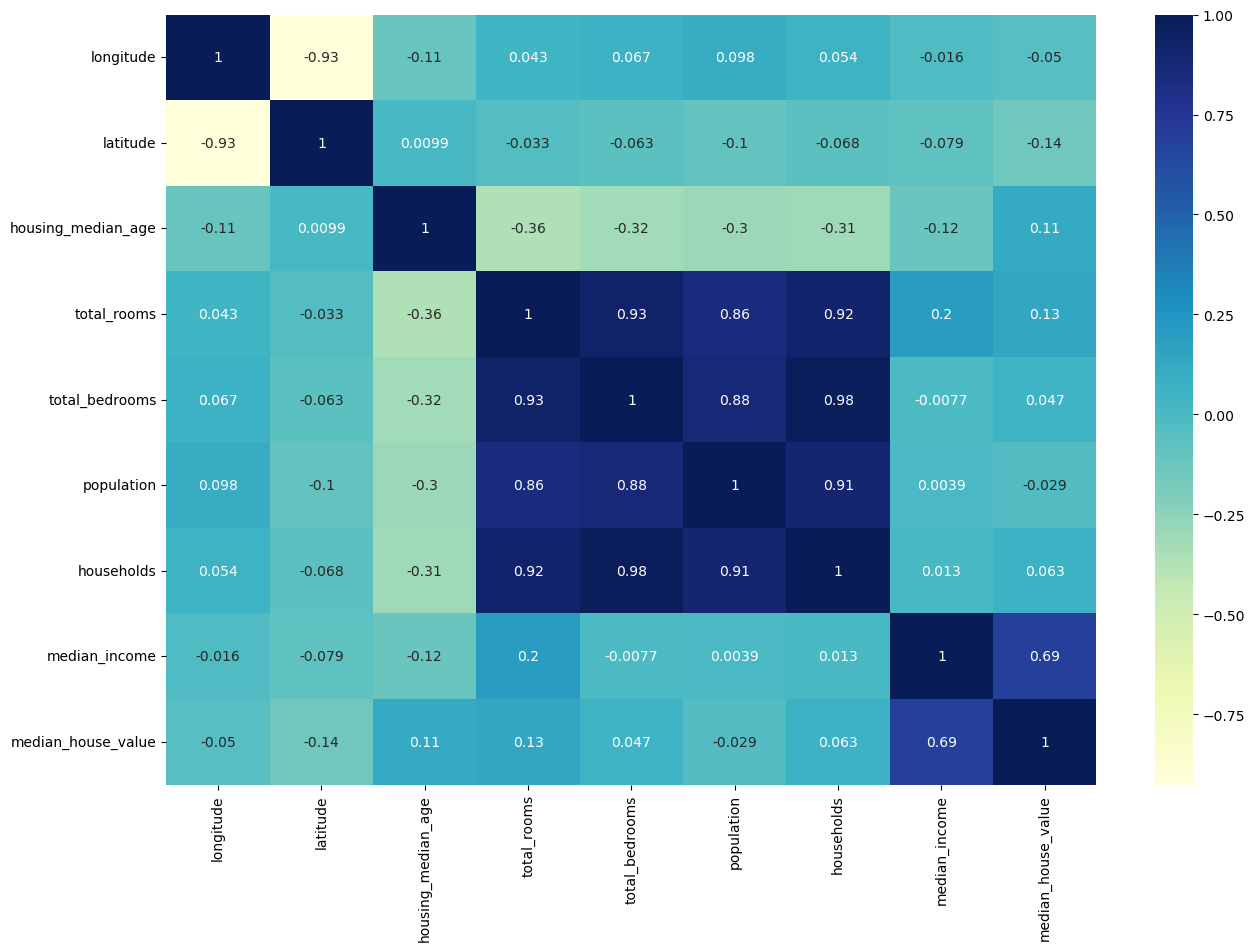

In [23]:
#heatmap to find corelation
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap="YlGnBu" )

In [24]:
#log used to handle columns with highly skewed data
#This can improve the performance of machine learning models that are sensitive to feature scaling.
train_df['total_rooms'] = np.log(train_df['total_rooms']+1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms']+1)
train_df['population'] = np.log(train_df['population']+1)
train_df['households'] = np.log(train_df['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

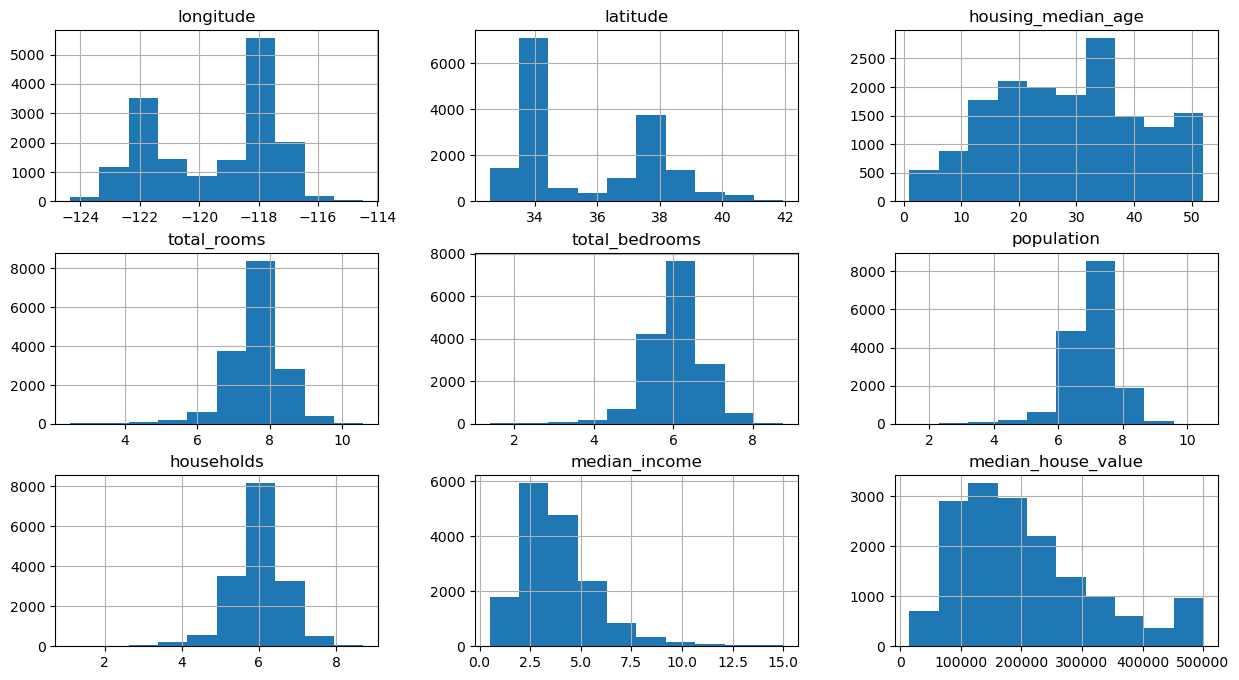

In [25]:
train_df.hist(figsize=(15,8))

In [27]:
#adding dummies 
pd.get_dummies(train_df['ocean_proximity'],dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5155,1,0,0,0,0
18594,0,0,0,0,1
7955,1,0,0,0,0
1819,0,0,0,1,0
16901,0,0,0,0,1
...,...,...,...,...,...
9355,0,0,0,0,1
14747,0,0,0,0,1
17458,0,0,0,0,1
10343,1,0,0,0,0


In [28]:
#joining
train_df.join(pd.get_dummies(train_df['ocean_proximity'],dtype=int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5155,-118.26,33.96,37.0,7.393878,5.950643,7.126087,5.860786,1.3971,<1H OCEAN,89800.0,1,0,0,0,0
18594,-122.09,37.11,32.0,7.877776,6.194405,6.939254,6.018593,3.6474,NEAR OCEAN,231600.0,0,0,0,0,1
7955,-118.16,33.88,18.0,7.735433,6.496775,7.498316,6.287859,1.9903,<1H OCEAN,170300.0,1,0,0,0,0
1819,-122.32,37.94,47.0,7.555905,5.648974,6.548219,5.620401,6.2712,NEAR BAY,267700.0,0,0,0,1,0
16901,-122.34,37.58,50.0,7.932003,6.612041,7.392032,6.549651,3.8413,NEAR OCEAN,372200.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,-122.64,37.96,29.0,5.934894,4.077537,5.023881,4.219508,9.5551,NEAR OCEAN,500001.0,0,0,0,0,1
14747,-117.05,32.58,23.0,7.559559,5.828946,7.239215,5.831882,4.0870,NEAR OCEAN,134800.0,0,0,0,0,1
17458,-119.86,34.42,23.0,7.280008,6.466145,7.138073,6.410175,1.1790,NEAR OCEAN,225000.0,0,0,0,0,1
10343,-117.66,33.61,16.0,7.612337,5.541264,6.672033,5.602119,8.4112,<1H OCEAN,286900.0,1,0,0,0,0


In [30]:
#droping ocean_proximity
train_df = train_df.join(pd.get_dummies(train_df['ocean_proximity'],dtype=int)).drop(['ocean_proximity'],axis=1)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5155,-118.26,33.96,37.0,7.393878,5.950643,7.126087,5.860786,1.3971,89800.0,1,0,0,0,0
18594,-122.09,37.11,32.0,7.877776,6.194405,6.939254,6.018593,3.6474,231600.0,0,0,0,0,1
7955,-118.16,33.88,18.0,7.735433,6.496775,7.498316,6.287859,1.9903,170300.0,1,0,0,0,0
1819,-122.32,37.94,47.0,7.555905,5.648974,6.548219,5.620401,6.2712,267700.0,0,0,0,1,0
16901,-122.34,37.58,50.0,7.932003,6.612041,7.392032,6.549651,3.8413,372200.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,-122.64,37.96,29.0,5.934894,4.077537,5.023881,4.219508,9.5551,500001.0,0,0,0,0,1
14747,-117.05,32.58,23.0,7.559559,5.828946,7.239215,5.831882,4.0870,134800.0,0,0,0,0,1
17458,-119.86,34.42,23.0,7.280008,6.466145,7.138073,6.410175,1.1790,225000.0,0,0,0,0,1
10343,-117.66,33.61,16.0,7.612337,5.541264,6.672033,5.602119,8.4112,286900.0,1,0,0,0,0


<Axes: >

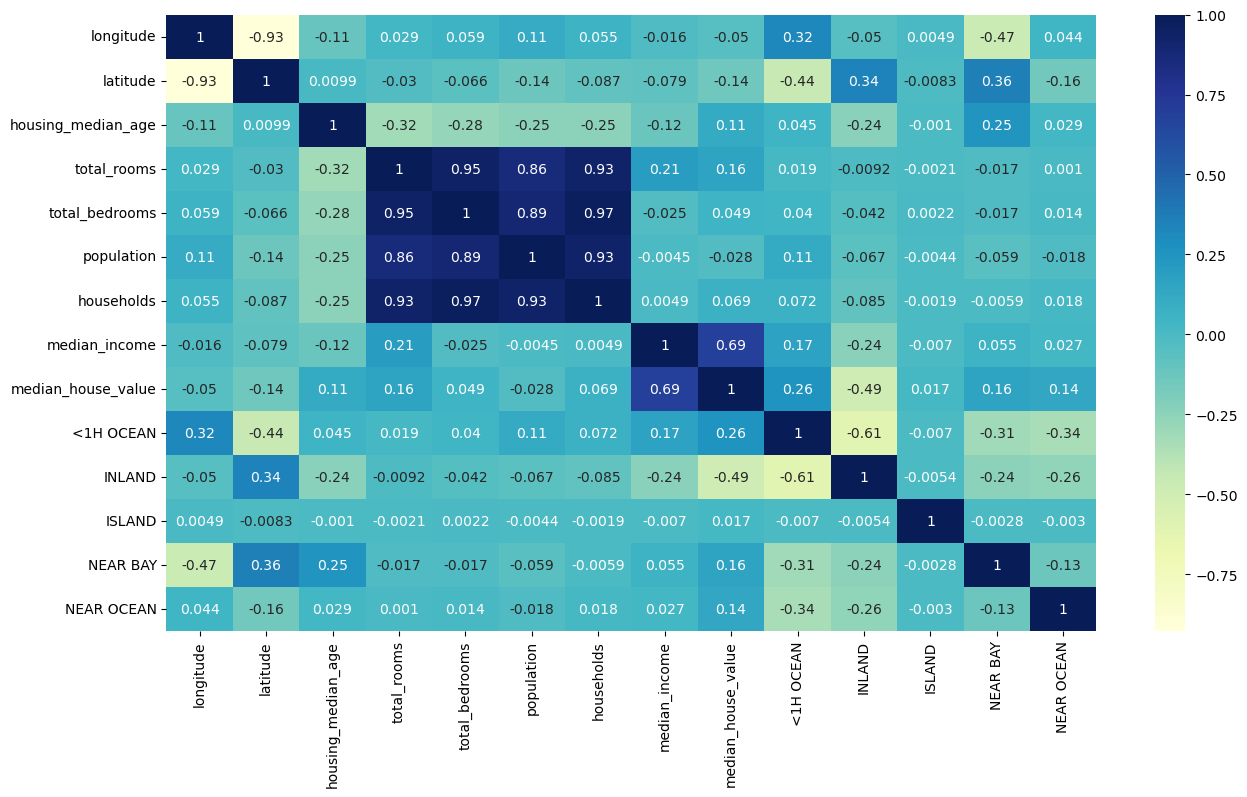

In [32]:
#heatmap to find corelation
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap="YlGnBu" )

<Axes: xlabel='longitude', ylabel='latitude'>

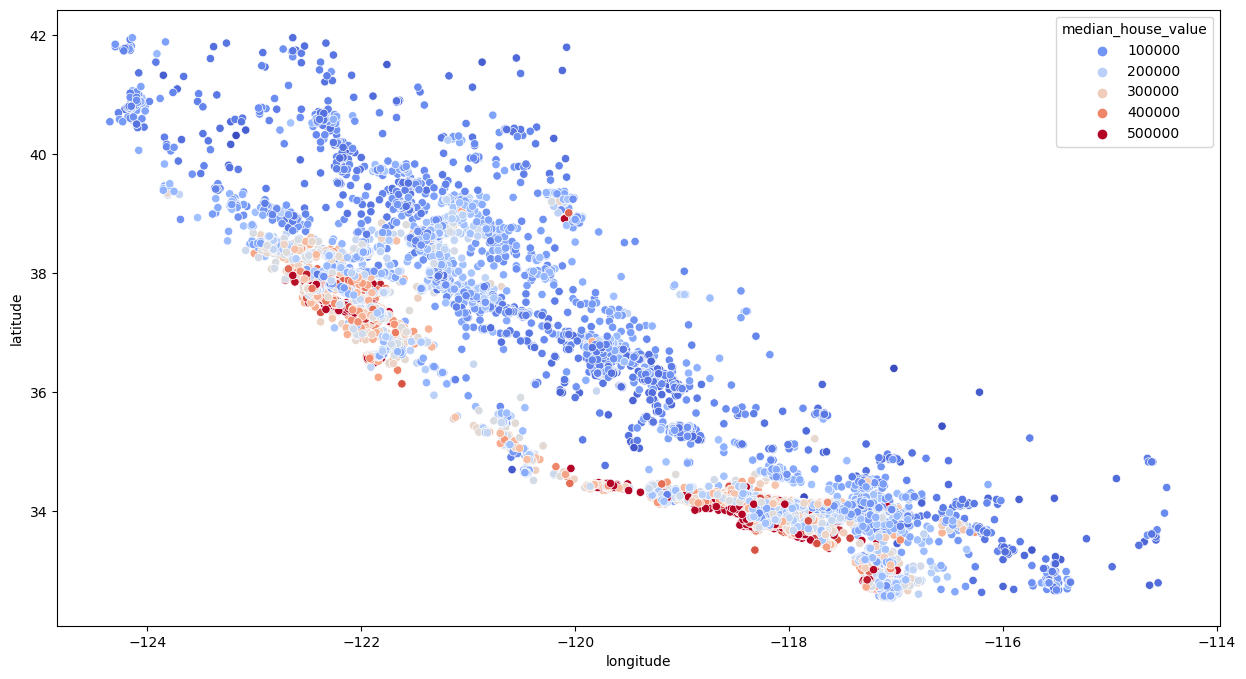

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude',y='latitude',data=train_df,hue="median_house_value",palette="coolwarm")

# feature Engineering

In [38]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['households_rooms'] = train_df['total_rooms'] / train_df['households']

<Axes: >

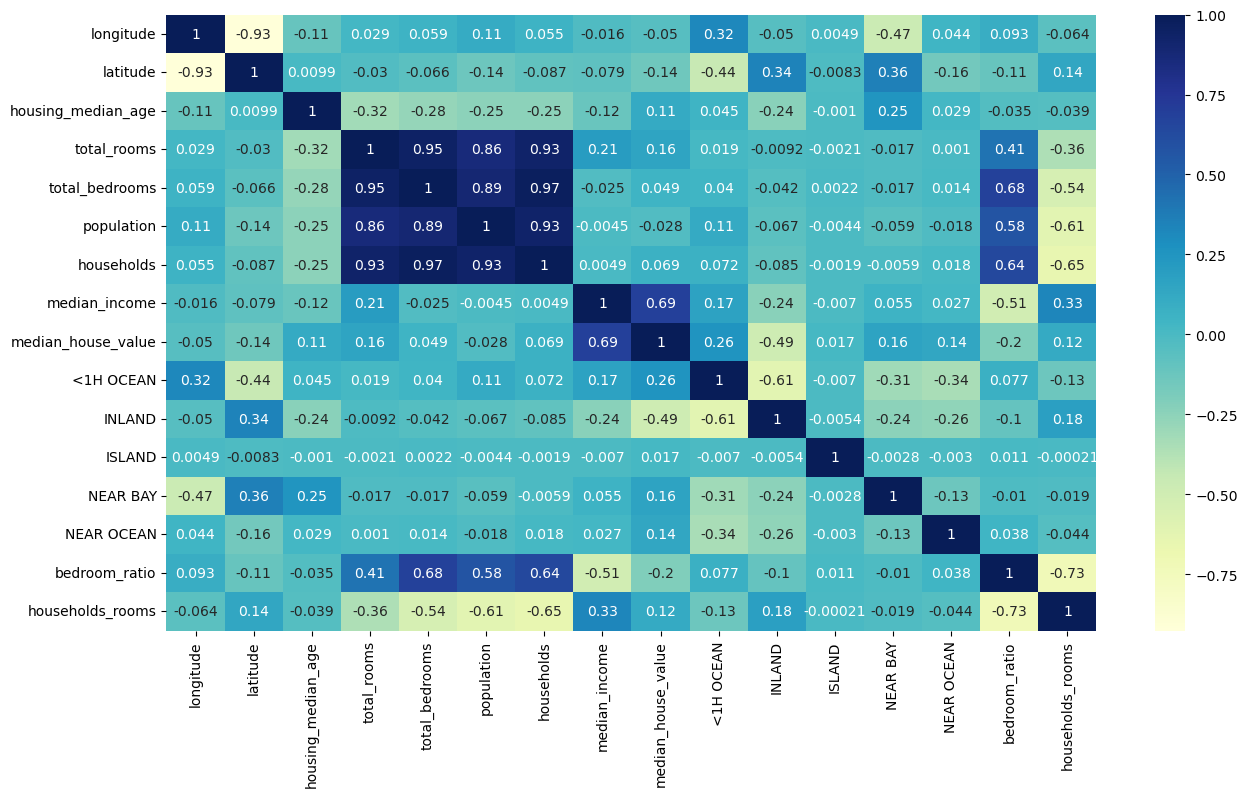

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap="YlGnBu" )

# Linear rigression

In [42]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)


LinearRegression()

In [43]:
test_df=x_test.join(y_test)

test_df['total_rooms'] = np.log(test_df['total_rooms']+1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms']+1)
test_df['population'] = np.log(test_df['population']+1)
test_df['households'] = np.log(test_df['households']+1)

test_df = test_df.join(pd.get_dummies(test_df['ocean_proximity'],dtype=int)).drop(['ocean_proximity'],axis=1)

test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['households_rooms'] = test_df['total_rooms'] / test_df['households']

In [44]:
x_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df['median_house_value']

In [45]:
reg.score(x_test, y_test)

0.6526481206465009

# Random forest model

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
forest.score(x_test, y_test)

0.8081819596665768